# Topics

## Full Corpus
+ 3,"soldier, army, france, french, court, officer"
+ 4,"sunday, religious, rest, labor, league, liberty"
+ 10,"history, century, rome, bishop, horn, empire"
+ 11,"commandment, seventh, holy, sanctuary, covenant, rest"
+ 12,"religion, catholic, roman, religious, principle, protestant"
+ 19,"president, united, congress, washington, national, american"
+ 28,"russia, russian, italy, italian, fleet, naval"
+ 36,"scripture, sign, point, second, view, text"
+ 37,"nation, government, europe, england, american, party"

health/character
+ 0,"character, influence, knowledge, principle, condition, nature"
+ 1,"tobacco, temperance, liquor, drink, habit, smoking"
+ 8,"husband, drink, wine, drinking, thief, mourn"
+ 9,"food, animal, water, fish, fruit, meal"
+ 18,"body, blood, death, pain, suffering, danger"
+ 32,"water, room, hour, minute, cold, foot"
+ 41,"bread, milk, meat, supper, salt, sugar"
+ 43,"disease, health, physician, treatment, patient, doctor"

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import GoH.modeldata
import GoH.modelviz
import GoH.utilities
import gspread
import matplotlib
from oauth2client.service_account import ServiceAccountCredentials
import os
import pandas as pd

In [3]:
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/Users/jeriwieringa/Dissertation/drafts/code/secrets/dissertation-881847769b13.json', scope)

gc = gspread.authorize(credentials)

In [4]:
colors = ['#4e79a7', '#f28e2b', '#b07aa1']

In [5]:
def create_piechart(df, topic_id, colors):
    return df.groupby('match?')['doc_id'].agg(pd.Series.nunique).plot(kind='pie', 
                                                             colors=colors, 
                                                             shadow=True, 
                                                             startangle=90, 
                                                             autopct='%.2f%%',
                                                             title='Percentage of Top 30 Docs from \n Full Corpus Model that "Match" Topic {}'.format(topic_id)
                                                            )

In [6]:
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [7]:
base_dir = "/Users/jeriwieringa/Dissertation/drafts/data/module-3/"
model_scheme = "full_corpus"

# Full Corpus Tests

In [8]:
labels = pd.read_csv(os.path.join(base_dir, 
                                  'dataframes', 
                                  'final', 
                                  '{}-{}_topicLabels.csv'.format(model_scheme, model_scheme)))

In [9]:
# Topics to filter by
topics = [3,4,10,11,12,19,28,36,37,0,1,8,9,18,32,41,43]

In [10]:
df = GoH.modeldata.model_to_df(base_dir, model_scheme, model_scheme )

In [11]:
df_filtered = GoH.modeldata.filter_dataframe_by_dates(df, 1859, 1870)

## Time Series

In [12]:
time_series = GoH.modeldata.topic_series(df, ['year', 'topic_id'], labels)

In [13]:
ts = time_series[time_series['topic_id'].isin(topics)]

In [14]:
ts = ts.pivot('year', 'topic_words', 'normalized_weight')

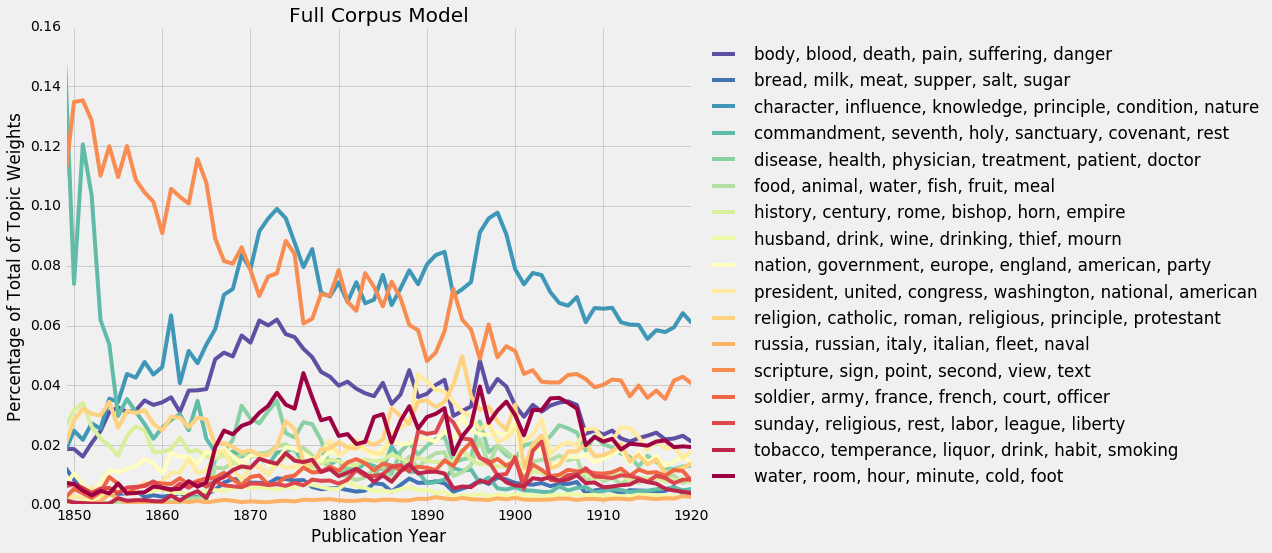

In [15]:
matplotlib.pyplot.figure()
ax = ts.plot(figsize=(10,8), colormap='Spectral_r', title='Full Corpus Model')
ax.set_xlabel("Publication Year")
ax.set_ylabel("Percentage of Total of Topic Weights")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Evaluate Topic Labeling and Review Docs

In [16]:
wtm = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_wtm.csv'.format(model_scheme, model_scheme)))

In [17]:
dts = gc.open('EvaluateCorpus')
worksheet = dts.get_worksheet(0)

scores = pd.DataFrame(worksheet.get_all_records())

### 36,"scripture, sign, point, second, view, text"
hypothesis: Examples and discussions of evidence of the second coming

In [18]:
t36 = wtm[wtm['topic_id'] == 36]

In [19]:
print(', '.join(t36['token'].tolist()))

scripture, sign, point, second, view, text, dead, subject, meaning, nature, record, seen, evidence, statement, written, beginning, known, answer, event, created


In [20]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 36)

In [21]:
df36 = scores[scores['topic'] == 36]

In [22]:
df36

,description,doc_id,match?,topic
32,argument for contingent immortality,RH18590901-V14-15-page2.txt,yes,36
33,death mortalities spirits,RH18640712-V24-07-page2.txt,yes,36
34,"death, souls",RH18640322-V24-17-page2.txt,yes,36
35,"life, soul, happiness",RH18680728-V32-06-page7.txt,partial,36
36,statement of philosophy of language with regar...,RH18590825-V14-14-page1.txt,partial,36
37,argument for contingent immortality,RH18590908-V14-16-page3.txt,yes,36
38,"daniel, sanctuary, prophecy",RH18700830-V36-11-page4.txt,yes,36
39,debate about soul sleep,"RH18700215-V35-08,09-page13.txt",yes,36
40,"letters: soul sleep, prophecy, spiritualism",RH18650314-V25-15-page5.txt,yes,36
41,"spirits, souls, death",RH18640315-V24-16-page2.txt,yes,36


Conclusions: Debates about conditional immortality, about the sabbath, and other theological points.

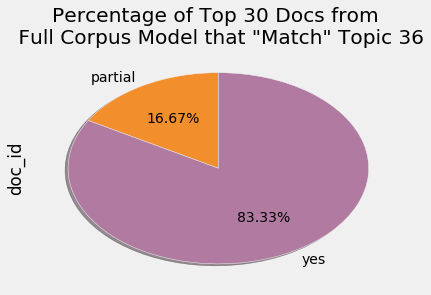

In [23]:
create_piechart(df36, 36, colors[1:])

### 0,"character, influence, knowledge, principle, condition, nature"

hypothesis: Discussion of developing particular attitudes toward health; health and law; hopefully some gender

In [24]:
t0 = wtm[wtm['topic_id'] == 0]

In [25]:
print(', '.join(t0['token'].tolist()))

character, influence, knowledge, principle, condition, nature, study, youth, individual, effort, form, purpose, evil, moral, human, physical, parent, exercise, habit, reason


In [26]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 0)

In [27]:
df0 = scores[scores['topic'] == 0]

In [28]:
df0

,description,doc_id,match?,topic
1,outline of general physiology,HR18690401-V03-10-page2.txt,partial,0
2,EGW on sickness as the result of sinning again...,HR18660801-V01-01-page3.txt,yes,0
3,"natural law, health, importance of physical te...",HR18660801-V01-01-page17.txt,yes,0
4,part of essay on temperments; temperment of ch...,HR18691001-V04-04-page3.txt,yes,0
5,harmony of the actions and elements of the body,HR18690401-V03-10-page1.txt,partial,0
6,cycle of life and death in cells and organizim...,HR18690801-V04-02-page2.txt,partial,0
7,exercise as part of the process of purging the...,HR18670901-V02-03-page5.txt,yes,0
8,dangers of going to school too early (before 1...,HR18690301-V03-09-page10.txt,yes,0
9,mans wellbeing dependent upon obeying health laws,HR18680201-V02-08-page13.txt,yes,0
10,ill look of those who keep health reform not a...,HR18680401-V02-10-page8.txt,partial,0


Conclusions: Emphasis on the connections between physical, moral, and mental health; the role of education and parenting on developing self-control and physical, moral, mental health.

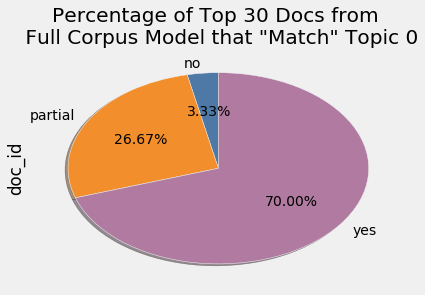

In [29]:
create_piechart(df0, 0, colors)

### 18,"body, blood, death, pain, suffering, danger"
Hypothesis: consequences of failing to keep the natural law

In [30]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 18)

In [31]:
t18 = wtm[wtm['topic_id'] == 18]

In [32]:
print(', '.join(t18['token'].tolist()))

body, blood, death, pain, suffering, danger, exclaimed, trouble, brain, poison, sleep, cell, caused, effect, germ, kill, condition, wound, victim, waste


In [33]:
df18 = scores[scores['topic'] == 18]

In [34]:
df18

,description,doc_id,match?,topic
63,disease of stomach caused by overeating,HR18670501-V01-10-page2.txt,yes,18
64,disease as consequence of breaking God's law,HR18670301-V01-08-page3.txt,yes,18
65,arguments against inorganic compounds and ferm...,HR18670701-V02-01-page4.txt,partial,18
66,battle metaphor for the body's response to ove...,HR18670301-V01-08-page2.txt,yes,18
67,digestion (Graham); principles of hygienic med...,HR18661101-V01-04-page5.txt,partial,18
68,digestion and circulation. concerning ideas of...,HR18661101-V01-04-page2.txt,partial,18
69,dyspepsia and its manifestations,HR18700401-V04-10-page8.txt,yes,18
70,sleep and fresh air in bedrooms,HR18691101-V04-05-page19.txt,partial,18
71,exercize to keep the body well organized; onio...,HR18680901-V03-03-page15.txt,partial,18
72,importance of rest/sleep,HR18670901-V02-03-page2.txt,yes,18


Conclusions: Principles of Health Reform

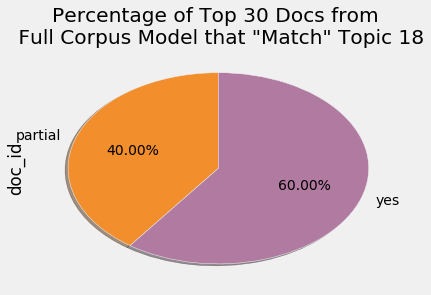

In [35]:
create_piechart(df18, 18, colors[1:])

### 11,"commandment, seventh, holy, sanctuary, covenant, rest"
Hypothesis: focus on the Sabbath and on the sanctuary doctrine.

In [36]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 11)

In [37]:
t11 = wtm[wtm['topic_id'] == 11]

In [38]:
print(', '.join(t11['token'].tolist()))

commandment, seventh, holy, sanctuary, covenant, rest, keeping, fourth, kept, adventist, change, observance, command, commanded, apostle, sinai, observe, table, jewish, seven


In [39]:
df11 = scores[scores['topic'] == 11]

In [40]:
df11

,description,doc_id,match?,topic
94,"covenant, ark of the covenant, decalogue",RH18641215-V24-03-page5.txt,yes,11
95,seventh day vs day in 7,RH18680804-V32-07-page2.txt,yes,11
96,"sabbath, decalogue","RH18600529-V16-01,02-page10.txt",yes,11
97,sabbath,RH18611203-V19-01-page2.txt,yes,11
98,part of response in defense of the sabbath,RH18650314-V25-15-page2.txt,yes,11
99,sabbath law still in force,RH18600503-V15-24-page2.txt,yes,11
100,"sabbath, decalogue entact",RH18660306-V27-14-page1.txt,yes,11
101,"sabbath, memorial of creation",RH18590714-V14-08-page1.txt,yes,11
102,sabbath exegesis,RH18640301-V23-14-page2.txt,yes,11
103,q&a on the sabbath,RH18660123-V27-08-page1.txt,yes,11


Conclusion: Sabbath and the commandments. Also has connections to the Sanctuary doctrine and discussions of the covenants.

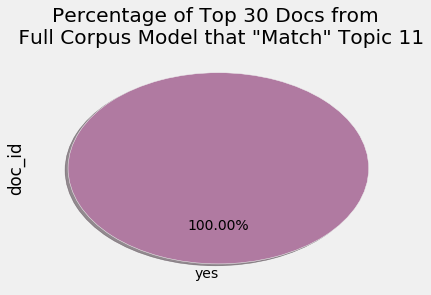

In [41]:
create_piechart(df11, 11, colors[2:])